In [1]:
import pandas as pd 

In [2]:
sports = pd.read_csv("archive/sports.csv")

In [3]:
sports

,class id,filepaths,labels,data set
0,0,train/air hockey/001.jpg,air hockey,train
1,0,train/air hockey/002.jpg,air hockey,train
2,0,train/air hockey/003.jpg,air hockey,train
3,0,train/air hockey/004.jpg,air hockey,train
4,0,train/air hockey/005.jpg,air hockey,train
...,...,...,...,...
14488,99,valid/wingsuit flying/1.jpg,wingsuit flying,valid
14489,99,valid/wingsuit flying/2.jpg,wingsuit flying,valid
14490,99,valid/wingsuit flying/3.jpg,wingsuit flying,valid
14491,99,valid/wingsuit flying/4.jpg,wingsuit flying,valid


In [4]:
sports["data set"].value_counts()

train    13493
test       500
valid      500
Name: data set, dtype: int64

In [5]:
sports_train = sports[sports["data set"] == 'train']
sports_test = sports[sports["data set"] == 'test']
sports_valid = sports[sports["data set"] == 'valid']

In [6]:
sports_train.head()

,class id,filepaths,labels,data set
0,0,train/air hockey/001.jpg,air hockey,train
1,0,train/air hockey/002.jpg,air hockey,train
2,0,train/air hockey/003.jpg,air hockey,train
3,0,train/air hockey/004.jpg,air hockey,train
4,0,train/air hockey/005.jpg,air hockey,train


In [7]:
sports_test.head()

,class id,filepaths,labels,data set
13493,0,test/air hockey/1.jpg,air hockey,test
13494,0,test/air hockey/2.jpg,air hockey,test
13495,0,test/air hockey/3.jpg,air hockey,test
13496,0,test/air hockey/4.jpg,air hockey,test
13497,0,test/air hockey/5.jpg,air hockey,test


In [8]:
target = ["football","basketball","baseball","golf","volleyball","hockey","sky diving"]

In [9]:
sports_train = sports_train[sports_train["labels"].isin(target)]
sports_test = sports_test[sports_test["labels"].isin(target)]
sports_valid = sports_valid[sports_valid["labels"].isin(target)]

In [10]:
sports_train["labels"].unique()

array(['baseball', 'basketball', 'football', 'golf', 'hockey',
       'volleyball'], dtype=object)

In [11]:
L = [sports_train,sports_test,sports_valid]

In [12]:
for dataframe in L:
    dataframe.drop(columns=["data set"],inplace=True)


In [13]:
sports_train.columns

Index(['class id', 'filepaths', 'labels'], dtype='object')

In [14]:
sports_train["class id"].unique()

array([ 7,  8, 31, 36, 41, 93], dtype=int64)

In [15]:
for dataframe in L:
    # Unique values in the "class id" column
    unique_values = dataframe["class id"].unique()

    # Mapping dictionary to replace unique values with indices
    mapping_dict = {value: idx for idx, value in enumerate(unique_values)}

    # Replace the "class id" column with the corresponding indices
    dataframe["class id"] = dataframe["class id"].replace(mapping_dict)

In [16]:
sports_train["class id"].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [18]:
sports_train.head()

,class id,filepaths,labels
838,0,train/baseball/001.jpg,baseball
839,0,train/baseball/002.jpg,baseball
840,0,train/baseball/003.jpg,baseball
841,0,train/baseball/004.jpg,baseball
842,0,train/baseball/005.jpg,baseball


In [19]:
for dataframe in L:
    dataframe.drop(columns=["labels"],inplace=True)

In [20]:
for dataframe in L:
    dataframe.reset_index(drop=True,inplace=True)

In [21]:
sports_train.head()

,class id,filepaths
0,0,train/baseball/001.jpg
1,0,train/baseball/002.jpg
2,0,train/baseball/003.jpg
3,0,train/baseball/004.jpg
4,0,train/baseball/005.jpg


In [23]:
sports_train["class id"].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [22]:
sports_test.head()

,class id,filepaths
0,0,test/baseball/1.jpg
1,0,test/baseball/2.jpg
2,0,test/baseball/3.jpg
3,0,test/baseball/4.jpg
4,0,test/baseball/5.jpg


In [24]:
sports_test["class id"].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [26]:
sports_valid["class id"].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [30]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import Model
from keras.optimizers import Adam

# Load and preprocess the data
def preprocess_image(img_path):
    img_path = "archive/"+img_path
    img = load_img(img_path, target_size=(224, 224))  # Assuming ResNet input size is 224x224
    img_array = img_to_array(img)
    return img_array

sports_train['image'] = sports_train['filepaths'].apply(preprocess_image)
sports_test['image'] = sports_test['filepaths'].apply(preprocess_image)
sports_valid['image'] = sports_valid['filepaths'].apply(preprocess_image)

In [33]:
sports_valid.head()

,class id,filepaths,image
0,0,valid/baseball/1.jpg,"[[[87.0, 94.0, 100.0], [92.0, 101.0, 106.0], [..."
1,0,valid/baseball/2.jpg,"[[[12.0, 21.0, 26.0], [16.0, 25.0, 30.0], [9.0..."
2,0,valid/baseball/3.jpg,"[[[69.0, 82.0, 36.0], [75.0, 88.0, 42.0], [75...."
3,0,valid/baseball/4.jpg,"[[[163.0, 193.0, 143.0], [163.0, 193.0, 143.0]..."
4,0,valid/baseball/5.jpg,"[[[3.0, 8.0, 11.0], [2.0, 7.0, 10.0], [1.0, 6...."


In [35]:
# Convert images to NumPy arrays
X_train = np.array(list(sports_train['image']))
X_test = np.array(list(sports_test['image']))
X_valid = np.array(list(sports_valid['image']))

# Convert class labels to NumPy arrays
y_train = np.array(sports_train['class id'])
y_test = np.array(sports_test['class id'])
y_valid = np.array(sports_valid['class id'])

In [38]:
print(X_train.shape ,y_train.shape)
print(X_test.shape ,y_test.shape)
print(X_valid.shape ,y_valid.shape)

(1005, 224, 224, 3) (1005,)
(30, 224, 224, 3) (30,)
(30, 224, 224, 3) (30,)


In [39]:
# Create data generators for data augmentation (optional) and batch feeding
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_datagen.fit(X_train)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
valid_generator = ImageDataGenerator().flow(X_valid, y_valid, batch_size=32)
test_generator = ImageDataGenerator().flow(X_test, y_test, batch_size=32, shuffle=False)

In [40]:
# Load the pre-trained ResNet model without the final classification layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the pre-trained layers to prevent weight updates during training
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=5, validation_data=valid_generator)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy}")

C:\Users\Admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
32/32 [==============================] - 132s 4s/step - loss: 1.8645 - accuracy: 0.5313 - val_loss: 0.5417 - val_accuracy: 0.6667
Epoch 2/5
32/32 [==============================] - 126s 4s/step - loss: 0.4266 - accuracy: 0.8478 - val_loss: 0.2267 - val_accuracy: 0.9000
Epoch 3/5
32/32 [==============================] - 123s 4s/step - loss: 0.3113 - accuracy: 0.8886 - val_loss: 0.0737 - val_accuracy: 0.9667
Epoch 4/5
32/32 [==============================] - 123s 4s/step - loss: 0.2189 - accuracy: 0.9313 - val_loss: 0.0972 - val_accuracy: 0.9667
Epoch 5/5
1/1 [==============================] - 3s 3s/step - loss: 0.0438 - accuracy: 1.0000
Test accuracy: 1.0


1/1 [==============================] - 4s 4s/step


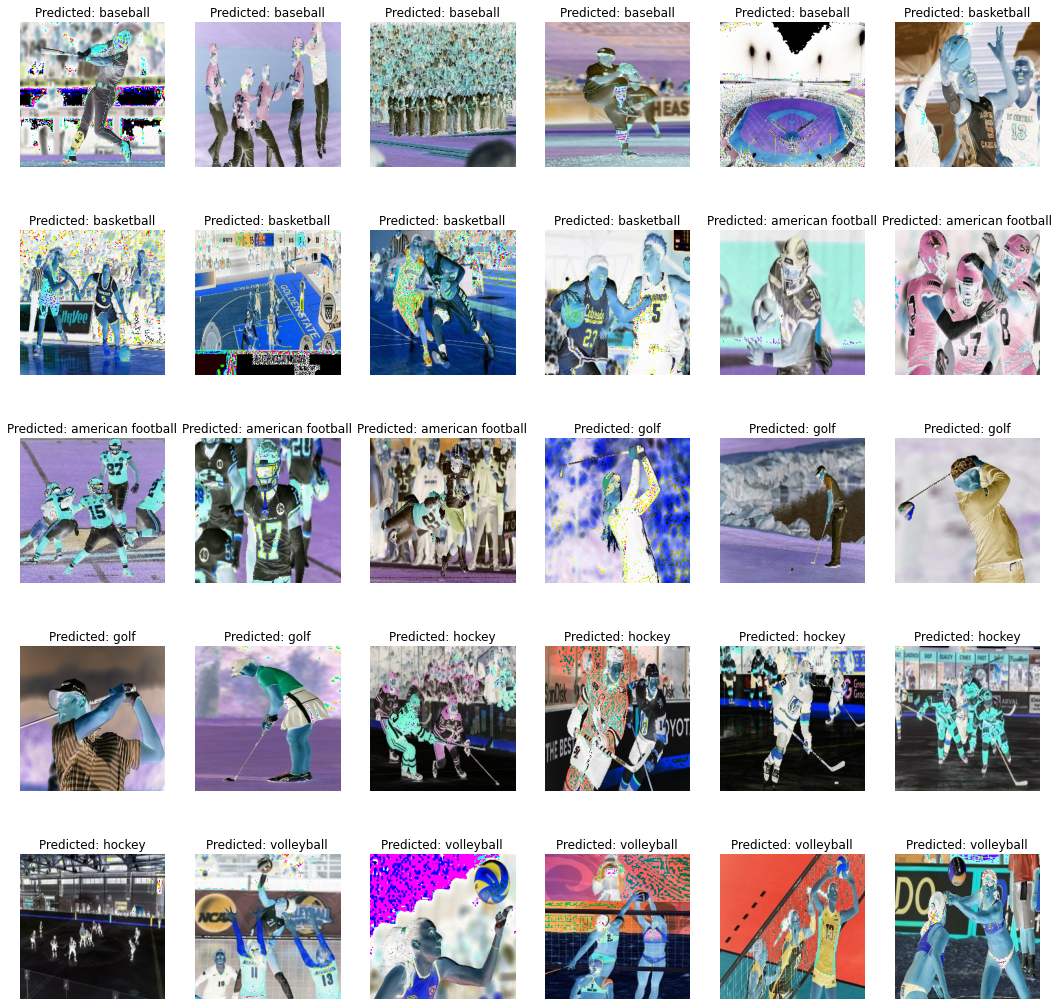

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred_probs = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Map class indices to class labels
class_labels = {0: 'baseball', 1: 'basketball', 2: 'american football', 3: 'golf', 4: 'hockey', 5: 'volleyball'}
y_pred_labels = [class_labels[pred_class] for pred_class in y_pred_classes]

# Display images from the test generator along with their predicted class labels
num_images = len(y_test)
rows = 5  # Number of rows in the grid
cols = (num_images + rows - 1) // rows

plt.figure(figsize=(15, 15))

for i in range(num_images):
    # Get the next batch of test images and their associated class labels
    batch_images, batch_labels = next(test_generator)
    for j in range(batch_images.shape[0]):
        if i * batch_images.shape[0] + j >= num_images:
            # Break the loop when all test images have been displayed
            break
        plt.subplot(rows, cols, i * batch_images.shape[0] + j + 1)
        image = batch_images[j] * 255  # Rescale pixel values to [0, 255] range
        plt.imshow(image.astype(np.uint8))  # Convert to integers before displaying
        plt.title(f"Predicted: {y_pred_labels[i * batch_images.shape[0] + j]}")
        plt.axis('off')

plt.tight_layout(pad=3.0)  # Add padding to increase space between images
plt.show()


1/1 [==============================] - 0s 201ms/step


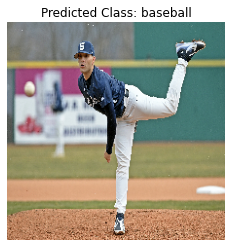

In [60]:
def preprocess_single_image(image_path):
    # Preprocess the image
    img = preprocess_image(image_path)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def predict_single_image(image_path):
    # Preprocess the image
    image_array = preprocess_single_image(image_path)

    # Make prediction
    prediction = model.predict(image_array)
    predicted_class_index = np.argmax(prediction[0])
    predicted_class_label = class_labels[predicted_class_index]

    # Display the image and the predicted class
    plt.imshow(image_array[0].astype(np.uint8))
    plt.title(f"Predicted Class: {predicted_class_label}")
    plt.axis('off')
    plt.show()

# Replace 'path_to_your_image.jpg' with the path to your own image
image_path = 'baseball_new_data/3.19.baseball.17.JPG.jpg'
predict_single_image(image_path)
